# Load and Inspect DataLoad and Inspect Data 

In [1]:
import pandas as pd

# Load datasets
bmkg_df = pd.read_csv('BMKG_dataset.csv')  # Replace with actual file path
jma_df = pd.read_csv('JMA_dataset.csv')    # Replace with actual file path

# Display the first few rows and check column names for both datasets
print("BMKG Dataset:")
print(bmkg_df.head())
print(bmkg_df.info())

print("\nJMA Dataset:")
print(jma_df.head())
print(jma_df.info())

BMKG Dataset:
          tgl            ot   lat     lon  depth  mag  \
0  2008/11/01  21:02:43.058 -9.18  119.06     10  4.9   
1  2008/11/01  20:58:50.248 -6.55  129.64     10  4.6   
2  2008/11/01  17:43:12.941 -7.01  106.63    121  3.7   
3  2008/11/01  16:24:14.755 -3.30  127.85     10  3.2   
4  2008/11/01  16:20:37.327 -6.41  129.54     70  4.3   

                     remark  strike1  dip1  rake1  strike2  dip2  rake2  
0  Sumba Region - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
1                 Banda Sea      NaN   NaN    NaN      NaN   NaN    NaN  
2          Java - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
3         Seram - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
4                 Banda Sea      NaN   NaN    NaN      NaN   NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      

# Data Cleaning

In [19]:
# Check for missing values
print("BMKG Missing Values:\n", bmkg_df.isnull().sum())
print("\nJMA Missing Values:\n", jma_df.isnull().sum())

# Drop or fill missing values if needed
# Example: fill missing values in JMA dataset with median values for numerical columns
jma_df.fillna(jma_df.median(), inplace=True)
bmkg_df.fillna(bmkg_df.median(), inplace=True)  

BMKG Missing Values:
 tgl            0
ot             0
lat            0
lon            0
depth          0
mag            0
remark         0
strike1    90152
dip1       90152
rake1      90152
strike2    90152
dip2       90152
rake2      90152
dtype: int64

JMA Missing Values:
 Date              0
Time              0
震央地名              0
Lat               0
Long              0
Depth             0
M                 0
最大震度              0
Source.Name    3832
dtype: int64


# Date-Time Formatting

In [20]:
#change the column names
# Merge Date and Time columns into a single Datetime column
bmkg_df['Datetime'] = pd.to_datetime(bmkg_df['tgl'] + ' ' + bmkg_df['ot'])

# Drop the original Date and Time columns
bmkg_df.drop(columns=['tgl', 'ot'], inplace=True)
bmkg_df.drop(columns=['strike1', 'strike2', 'dip1', 'dip2' ,'rake1', 'rake2'], inplace=True)
# Display the first few rows of the updated dataset
print("BMKG Dataset:")
print(bmkg_df.head())
print(bmkg_df.info())


BMKG Dataset:
    lat     lon  depth  mag                    remark                Datetime
0 -9.18  119.06     10  4.9  Sumba Region - Indonesia 2008-11-01 21:02:43.058
1 -6.55  129.64     10  4.6                 Banda Sea 2008-11-01 20:58:50.248
2 -7.01  106.63    121  3.7          Java - Indonesia 2008-11-01 17:43:12.941
3 -3.30  127.85     10  3.2         Seram - Indonesia 2008-11-01 16:24:14.755
4 -6.41  129.54     70  4.3                 Banda Sea 2008-11-01 16:20:37.327
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   lat       92887 non-null  float64       
 1   lon       92887 non-null  float64       
 2   depth     92887 non-null  int64         
 3   mag       92887 non-null  float64       
 4   remark    92887 non-null  object        
 5   Datetime  92887 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int

In [21]:
#drop the unnecessary columns
bmkg_df.drop(columns=['remark'], inplace=True) 

# Standardize Column Names

In [22]:
#change the column names
bmkg_df.rename(columns={'mag':'Magnitude', 'depth':'Depth', 'lat':'Latitude', 'lon':'Longitude'}, inplace=True)

# Display the first few rows of the updated dataset
print("BMKG Dataset:")
print(bmkg_df.head())

BMKG Dataset:
   Latitude  Longitude  Depth  Magnitude                Datetime
0     -9.18     119.06     10        4.9 2008-11-01 21:02:43.058
1     -6.55     129.64     10        4.6 2008-11-01 20:58:50.248
2     -7.01     106.63    121        3.7 2008-11-01 17:43:12.941
3     -3.30     127.85     10        3.2 2008-11-01 16:24:14.755
4     -6.41     129.54     70        4.3 2008-11-01 16:20:37.327


In [23]:
#change the column names
# Merge Date and Time columns into a single Datetime column
jma_df['Datetime'] = pd.to_datetime(jma_df['Date'] + ' ' + jma_df['Time'])

# Drop the original Date and Time columns
jma_df.drop(columns=['Date', 'Time', 'Source.Name', '最大震度','震央地名'], inplace=True)

# Display the first few rows of the updated dataset
print("\nJMA Dataset:")
print(jma_df.head())


JMA Dataset:
         Lat        Long  Depth    M            Datetime
0  35°20.3'N  133°12.7'E     12  3.6 1985-12-31 02:26:48
1  36°24.4'N  140°41.8'E     55  3.3 1985-12-30 19:11:46
2  37°12.6'N  139°56.2'E      6  3.5 1985-12-30 15:56:17
3  27°58.1'N  129°39.9'E      0  4.2 1985-12-30 15:20:15
4  42°53.3'N  145°26.7'E     35  3.7 1985-12-29 09:22:20


In [24]:
#change the column names
jma_df.rename(columns={'Lat':'Latitude', 'Long':'Longitude', 'Depth':'Depth', 'M':'Magnitude'}, inplace=True)

# Display the first few rows of the updated dataset
print("\nJMA Dataset:")
print(jma_df.head())


JMA Dataset:
    Latitude   Longitude  Depth Magnitude            Datetime
0  35°20.3'N  133°12.7'E     12       3.6 1985-12-31 02:26:48
1  36°24.4'N  140°41.8'E     55       3.3 1985-12-30 19:11:46
2  37°12.6'N  139°56.2'E      6       3.5 1985-12-30 15:56:17
3  27°58.1'N  129°39.9'E      0       4.2 1985-12-30 15:20:15
4  42°53.3'N  145°26.7'E     35       3.7 1985-12-29 09:22:20


# Convert Coordinates to Decimal Degrees 

In [25]:
import numpy as np
import re
import pandas as pd

# Updated function to handle both DMS and decimal formats
def dms_to_decimal(coord):
    # Check if the value is NaN
    if pd.isna(coord):
        return np.nan
    
    # If the coordinate is already in decimal format, return it as a float
    try:
        # Try converting directly to float; if it works, we have a decimal value
        return float(coord)
    except ValueError:
        # If direct conversion fails, it's likely in DMS format
        pass
    
    # For DMS format, extract degrees, minutes, and direction
    match = re.match(r"(\d+)°(\d+\.\d+)'([NSEW])", str(coord))
    if match:
        degrees = float(match.group(1))
        minutes = float(match.group(2))
        direction = match.group(3)
        
        # Convert DMS to decimal degrees
        decimal = degrees + (minutes / 60)
        
        # Make coordinates negative for South and West
        if direction in ['S', 'W']:
            decimal = -decimal
            
        return decimal
    else:
        raise ValueError(f"Invalid coordinate format: {coord}")

# Replace '不明' with NaN in the dataset
jma_df.replace('不明', np.nan, inplace=True)

# Apply the function to the Latitude and Longitude columns
jma_df['Latitude'] = jma_df['Latitude'].apply(dms_to_decimal)
jma_df['Longitude'] = jma_df['Longitude'].apply(dms_to_decimal)

# Display the updated dataset
print("\nUpdated JMA Dataset with Decimal Coordinates:")
print(jma_df.head())



Updated JMA Dataset with Decimal Coordinates:
    Latitude   Longitude  Depth Magnitude            Datetime
0  35.338333  133.211667     12       3.6 1985-12-31 02:26:48
1  36.406667  140.696667     55       3.3 1985-12-30 19:11:46
2  37.210000  139.936667      6       3.5 1985-12-30 15:56:17
3  27.968333  129.665000      0       4.2 1985-12-30 15:20:15
4  42.888333  145.445000     35       3.7 1985-12-29 09:22:20


# Normalization and Scaling

In [26]:
import numpy as np

# Replace non-numeric values (like '不明') with NaN in the dataset
jma_df.replace('不明', np.nan, inplace=True)

# Check if there are still non-numeric values in Latitude and Longitude columns
# This will help us identify and drop or handle rows with invalid data
try:
    # Convert the Latitude and Longitude columns to decimal format
    jma_df['Latitude'] = jma_df['Latitude'].apply(dms_to_decimal)
    jma_df['Longitude'] = jma_df['Longitude'].apply(dms_to_decimal)
except ValueError as e:
    print(f"Error converting coordinates: {e}")

# Display any rows with NaN values after replacing '不明'
print("Rows with NaN values after replacement:")
print(jma_df[jma_df.isna().any(axis=1)])

# Option 1: Drop rows with NaN values (if they are few and not critical)
jma_df.dropna(inplace=True)

# Option 2: Alternatively, you could impute or handle NaN values in a way that makes sense for your model

# Display the cleaned dataset
print("\nCleaned JMA Dataset:")
print(jma_df.head())

Rows with NaN values after replacement:
        Latitude   Longitude  Depth Magnitude            Datetime
6      27.083333  142.200000      0       NaN 1985-12-27 23:36:00
9      27.083333  142.200000      0       NaN 1985-12-25 00:22:00
22     24.383333  123.750000      0       NaN 1985-12-19 20:27:00
26     27.083333  142.200000      0       NaN 1985-12-16 14:37:00
36     34.233333  135.166667      0       NaN 1985-12-09 19:20:00
...          ...         ...    ...       ...                 ...
92324  27.003333  142.423333     67       NaN 2022-04-11 23:01:26
92436  27.051667  142.331667     74       NaN 2022-05-23 20:25:37
92551  24.561667  141.181667    148       NaN 2022-05-01 14:43:06
92813  24.806667  142.643333     67       NaN 2022-07-14 02:49:46
92848  26.536667  142.521667     47       NaN 2022-07-06 10:40:15

[7869 rows x 5 columns]

Cleaned JMA Dataset:
    Latitude   Longitude  Depth Magnitude            Datetime
0  35.338333  133.211667     12       3.6 1985-12-31 02:26:

# handling the missing values

In [27]:
# Interpolate missing values in the 'Magnitude' column
jma_df['Magnitude'] = jma_df['Magnitude'].interpolate(method='linear')

# Verify that there are no more NaN values in 'Magnitude'
print("Rows with NaN values in Magnitude after interpolation:")
print(jma_df[jma_df['Magnitude'].isna()])


Rows with NaN values in Magnitude after interpolation:
Empty DataFrame
Columns: [Latitude, Longitude, Depth, Magnitude, Datetime]
Index: []


In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaling to Depth and Magnitude columns in both datasets
bmkg_df[['Depth', 'Magnitude']] = scaler.fit_transform(bmkg_df[['Depth', 'Magnitude']])
jma_df[['Depth', 'Magnitude']] = scaler.transform(jma_df[['Depth', 'Magnitude']])

print("\nScaled BMKG Dataset:")
print(bmkg_df.head())

print("\nScaled JMA Dataset:")
print(jma_df.head())



Scaled BMKG Dataset:
   Latitude  Longitude     Depth  Magnitude                Datetime
0     -9.18     119.06  0.010695   0.565217 2008-11-01 21:02:43.058
1     -6.55     129.64  0.010695   0.521739 2008-11-01 20:58:50.248
2     -7.01     106.63  0.159091   0.391304 2008-11-01 17:43:12.941
3     -3.30     127.85  0.010695   0.318841 2008-11-01 16:24:14.755
4     -6.41     129.54  0.090909   0.478261 2008-11-01 16:20:37.327

Scaled JMA Dataset:
    Latitude   Longitude     Depth  Magnitude            Datetime
0  35.338333  133.211667  0.013369   0.376812 1985-12-31 02:26:48
1  36.406667  140.696667  0.070856   0.333333 1985-12-30 19:11:46
2  37.210000  139.936667  0.005348   0.362319 1985-12-30 15:56:17
3  27.968333  129.665000 -0.002674   0.463768 1985-12-30 15:20:15
4  42.888333  145.445000  0.044118   0.391304 1985-12-29 09:22:20


# Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split

# Define features and target for splitting
X_bmkg = bmkg_df[['Latitude', 'Longitude', 'Depth', 'Magnitude']]
y_bmkg = bmkg_df['Magnitude']

X_jma = jma_df[['Latitude', 'Longitude', 'Depth', 'Magnitude']]
y_jma = jma_df['Magnitude']

# Split the datasets
X_train_bmkg, X_test_bmkg, y_train_bmkg, y_test_bmkg = train_test_split(X_bmkg, y_bmkg, test_size=0.2, random_state=42)
X_train_jma, X_test_jma, y_train_jma, y_test_jma = train_test_split(X_jma, y_jma, test_size=0.2, random_state=42)

print("BMKG Train/Test Split:")
print(X_train_bmkg.shape, X_test_bmkg.shape)
print("\nJMA Train/Test Split:")
print(X_train_jma.shape, X_test_jma.shape)

BMKG Train/Test Split:
(74309, 4) (18578, 4)

JMA Train/Test Split:
(68267, 4) (17067, 4)


In [31]:
# Save the cleaned and preprocessed datasets
bmkg_df.to_csv('BMKG_cleaned.csv', index=False)
jma_df.to_csv('JMA_cleaned.csv', index=False)

print("Datasets saved successfully!")

Datasets saved successfully!


In [32]:
# save the train and test datasets
X_train_bmkg.to_csv('X_train_bmkg.csv', index=False)
y_train_bmkg.to_csv('y_train_bmkg.csv', index=False)
X_test_bmkg.to_csv('X_test_bmkg.csv', index=False)
y_test_bmkg.to_csv('y_test_bmkg.csv', index=False)

X_train_jma.to_csv('X_train_jma.csv', index=False)
y_train_jma.to_csv('y_train_jma.csv', index=False)
X_test_jma.to_csv('X_test_jma.csv', index=False)
y_test_jma.to_csv('y_test_jma.csv', index=False)

print("Train and Test datasets saved successfully!")

Train and Test datasets saved successfully!


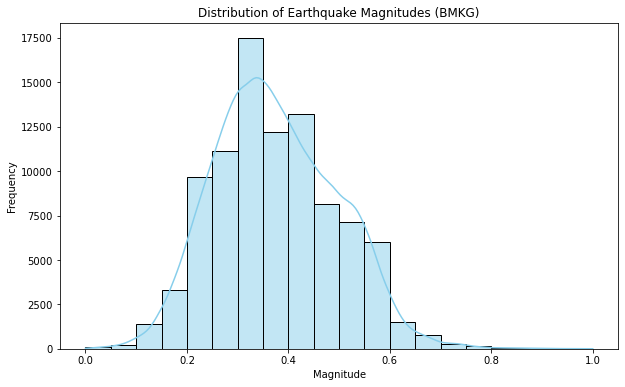

In [33]:
# visualize the data for bmkg dataset
import matplotlib.pyplot as plt
import seaborn

# Plot the distribution of Magnitude values in the BMKG dataset
plt.figure(figsize=(10, 6))
seaborn.histplot(bmkg_df['Magnitude'], bins=20, color='skyblue', kde=True)
plt.title('Distribution of Earthquake Magnitudes (BMKG)')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

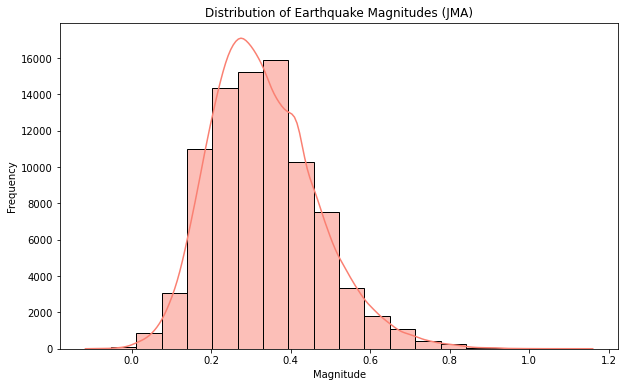

In [34]:
# Plot the distribution of Magnitude values in the JMA dataset
plt.figure(figsize=(10, 6))
seaborn.histplot(jma_df['Magnitude'], bins=20, color='salmon', kde=True)
plt.title('Distribution of Earthquake Magnitudes (JMA)')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

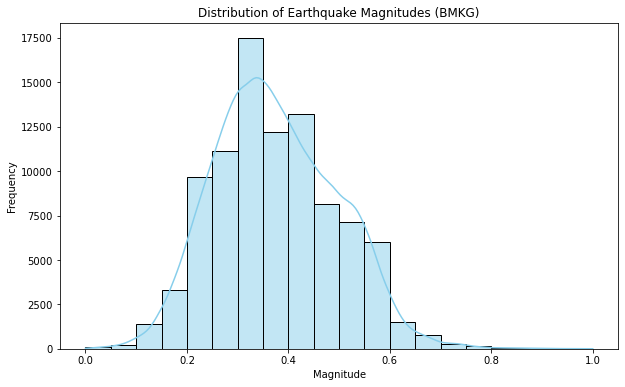

In [35]:
# save the distribution of magnitude pictures
plt.figure(figsize=(10, 6))
seaborn.histplot(bmkg_df['Magnitude'], bins=20, color='skyblue', kde=True)
plt.title('Distribution of Earthquake Magnitudes (BMKG)')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.savefig('bmkg_magnitude_distribution.png')

# the full sammary of the data preparation and preprocessing

# 1. Load and inspect the datasets
# 2. Data Cleaning
# 3. Date-Time Formatting
# 4. Standardize Column Names
# 5. Convert Coordinates to Decimal Degrees
# 6. Normalization and Scaling
# 7. Train-Test Split
# 8. Save the cleaned and preprocessed
# 9. Visualize the data
